# Notes
* this article is very nice: [link](https://towardsdatascience.com/read-text-from-image-with-one-line-of-python-code-c22ede074cac)
    * to run this jupyter notebook you need to install the things above as in the article

In [31]:
import cv2
import pytesseract

import numpy as np
import matplotlib.pyplot as plt 
import PIL
from PIL import Image, ImageOps
import numpy
from sklearn import preprocessing
import re
from matplotlib.patches import Rectangle

plt.rcParams['font.family']='serif'
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

PNG
(1193, 474)
RGBA


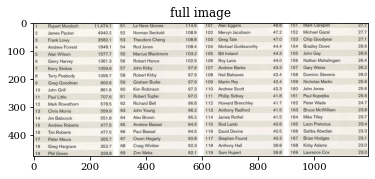

In [2]:
image = Image.open(r'C:\Users\Research\Documents\GitHub\econ\billionaires\data\top snippet .png')


print(image.format)
print(image.size)
print(image.mode)

plt.imshow(image,cmap='Greys_r')
plt.title('full image')
plt.show()

1193 298.25


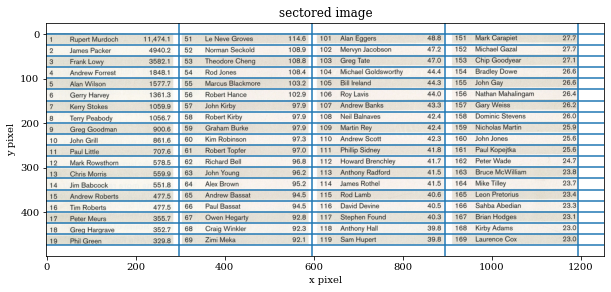

In [13]:
fig, ax = plt.subplots(figsize=(10,5))


ax.imshow(image,cmap='Greys_r')


dimensions = image.size

x_max = dimensions[0]
y_max = dimensions[1]
print(x_max, x_max/4)

for i in range(1, 5): 
    ax.axvline(x=i*x_max/4)

for i in range(20):
    ax.axhline(i*(-25)+y_max)

ax.set(title='sectored image', xlabel='x pixel', ylabel='y pixel')
plt.show()

1||Rupert Murdoch||11,474.14||


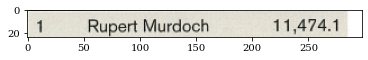

In [30]:
cell = image.crop((0,0,x_max/4,y_max-(18*25)))

text = pytesseract.image_to_string(cell)
text = text.replace('\n', '@')
text = re.sub('@+', '||', text)
print(text)

plt.imshow(cell,cmap='Greys_r')

DISCLAIMER: Image resolution looks low in plot because plot resolution is default low. It is actually higher.


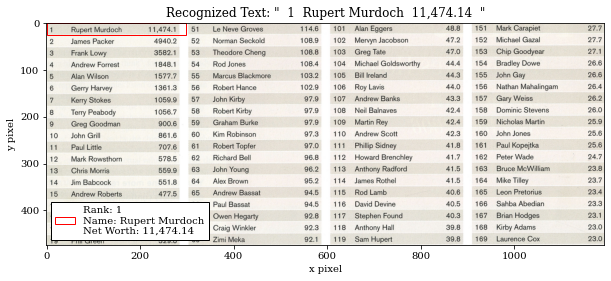

In [45]:
sub_dimensions = (0,0,x_max/4,y_max-(18*25))
sub_cell = image.crop(sub_dimensions)

text = pytesseract.image_to_string(sub_cell)
text = text.replace('\n', '@')
text = re.sub('@+', '||', text)

text_list = text.split('||')

title_str = 'Recognized Text: "  '+text.replace('||','  ')+'"'
label_str = 'Rank: '+text_list[0] + '\n' + 'Name: '+text_list[1] + '\n' + 'Net Worth: '+text_list[2]

fig, ax = plt.subplots(figsize=(10,5))

ax.imshow(image,cmap='Greys_r')

rect = Rectangle((0, 0), x_max/4, 25, linewidth=1, edgecolor='r', facecolor='none', label=label_str)
ax.add_patch(rect)

ax.set(title=title_str, xlabel='x pixel', ylabel='y pixel')
ax.legend(fancybox=False, framealpha=1, edgecolor='black', loc='lower left')


print("DISCLAIMER: Image resolution looks low in plot because plot resolution is default low. It is actually higher.")

plt.show()
